<a href="https://colab.research.google.com/github/poornimababu2021-maker/data-analysis/blob/main/Breast_cancer_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
import pandas as pd
df=pd.read_csv("breast-cancer.data")

In [21]:
df.head()

,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no.1
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [22]:
df.dtypes

,0
no-recurrence-events,object
30-39,object
premeno,object
30-34,object
0-2,object
no,object
3,int64
left,object
left_low,object
no.1,object


In [23]:
df.shape

(285, 10)

In [24]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events,no-recurrence-events
30-39,40-49,40-49,60-69,40-49,60-69,50-59,60-69,40-49,40-49,40-49
premeno,premeno,premeno,ge40,premeno,ge40,premeno,ge40,premeno,premeno,premeno
30-34,20-24,20-24,15-19,0-4,15-19,25-29,20-24,50-54,20-24,0-4
0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2,0-2
no,no,no,no,no,no,no,no,no,no,no
3,2,2,2,2,2,2,1,2,2,3
left,right,left,right,right,left,left,left,left,right,left
left_low,right_up,left_low,left_up,right_low,left_low,left_low,left_low,left_low,left_up,central
no.1,no,no,no,no,no,no,no,no,no,no


In [30]:
df.columns=['Class','age','menopause','tumor_size','inv_nodes','node_caps','deg_malig','breast','breast_quad','irradiant']
display(df.head())

,Class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiant
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [31]:
for col in df.select_dtypes(include=['object']).columns:
  unique_vals=df[col].unique()
  print(f"Column '{col}'({len(unique_vals)} unique values:")
  print(unique_vals)
  print("_" * 50)

Column 'Class'(2 unique values:
['no-recurrence-events' 'recurrence-events']
__________________________________________________
Column 'age'(6 unique values:
['40-49' '60-69' '50-59' '30-39' '70-79' '20-29']
__________________________________________________
Column 'menopause'(3 unique values:
['premeno' 'ge40' 'lt40']
__________________________________________________
Column 'tumor_size'(11 unique values:
['20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '30-34' '40-44' '35-39'
 '5-9' '45-49']
__________________________________________________
Column 'inv_nodes'(7 unique values:
['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
__________________________________________________
Column 'node_caps'(3 unique values:
['no' 'yes' '?']
__________________________________________________
Column 'breast'(2 unique values:
['right' 'left']
__________________________________________________
Column 'breast_quad'(6 unique values:
['right_up' 'left_low' 'left_up' 'right_low' 'central' '?']
___________

In [34]:
import numpy as np

# Convert all '?' to NaN
df.replace('?', np.nan, inplace=True)

# Drop rows with missing values in any column
df.dropna(inplace=True)

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

# Display the shape of the dataframe after dropping rows
print("Shape of the dataframe after dropping rows with missing values:")
print(df.shape)

Shape of the dataframe after dropping rows with missing values:
(276, 10)


In [36]:
if df is not None:
    for col in df.columns:
        if df[col].dtype == object:
             print(col,df[col][df[col] == '?'].count())

no-recurrence-events 0
30-39 0
premeno 0
30-34 0
0-2 0
no 8
left 0
left_low 1
no.1 0


In [48]:
import numpy as np

# Replace '?' with NaN in the DataFrame
df.replace('?', np.nan, inplace=True)

# Calculate the proportion of missing values for each column
missing_proportions = df.isnull().mean()

# Print the missing proportions for columns with missing values
print("Proportion of missing values per column:")
print(missing_proportions[missing_proportions > 0])

Proportion of missing values per column:
no          0.028070
left_low    0.003509
dtype: float64


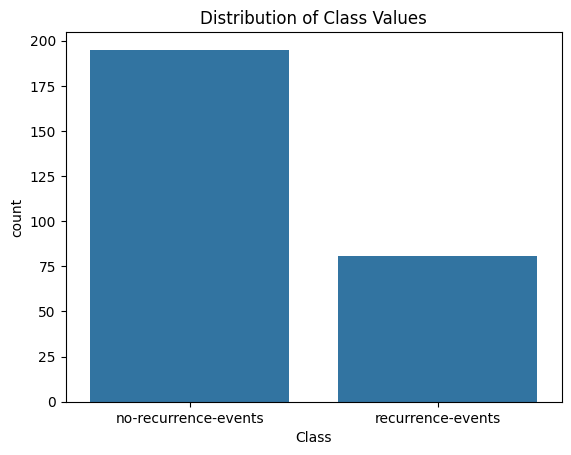

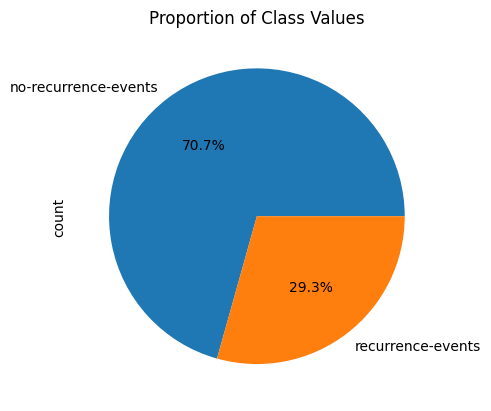

In [51]:
if df is not None:
    # Countplot
    sns.countplot(x = "Class", data = df)
    plt.title("Distribution of Class Values")
    plt.show()

    # Pie chart
    df['Class'].value_counts().plot.pie(autopct = "%.1f%%")
    plt.title("Proportion of Class Values")
    plt.show()

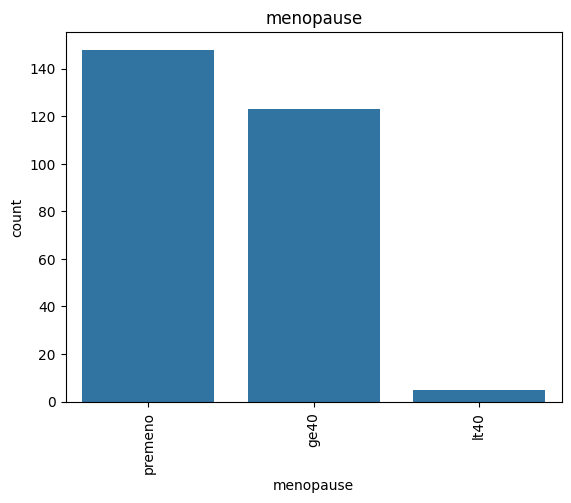

Proportion of menopause
menopause
premeno    53.623188
ge40       44.565217
lt40        1.811594
Name: proportion, dtype: float64


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

if df is not None:
    sns.countplot(x="menopause", data = df)
    plt.xticks(rotation=90)
    plt.title("menopause")
    plt.show()

    print("Proportion of menopause")
    print(df.menopause.value_counts(normalize = True)*100)

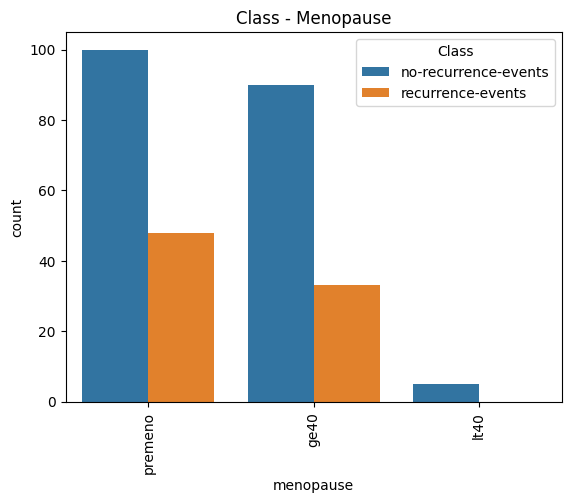

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

if df is not None:
    sns.countplot(x="menopause", hue="Class", data=df)
    plt.xticks(rotation=90)
    plt.title("Class - Menopause")
    plt.show()

In [53]:
# Example of replacing values in the 'age' column
# Grouping some age ranges for demonstration purposes
df['age'] = df['age'].replace({
    "20-29": "30-39",
    "70-79": "60-69"
})

# Display the updated value counts for the 'age' column
print("Updated proportion of Age values:")
print(df.age.value_counts(normalize = True)*100)

Updated proportion of Age values:
age
50-59    32.971014
40-49    32.246377
60-69    21.739130
30-39    13.043478
Name: proportion, dtype: float64


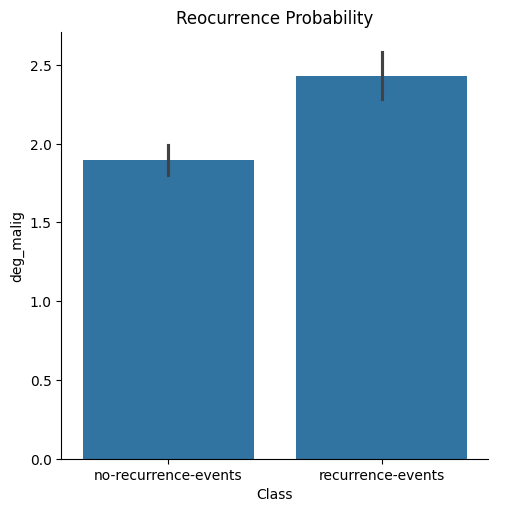

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

if df is not None:
    sns.catplot(x = "Class", y = "deg_malig",
                data = df, kind = "bar", height= 5)
    plt.title("Reocurrence Probability")
    plt.show()

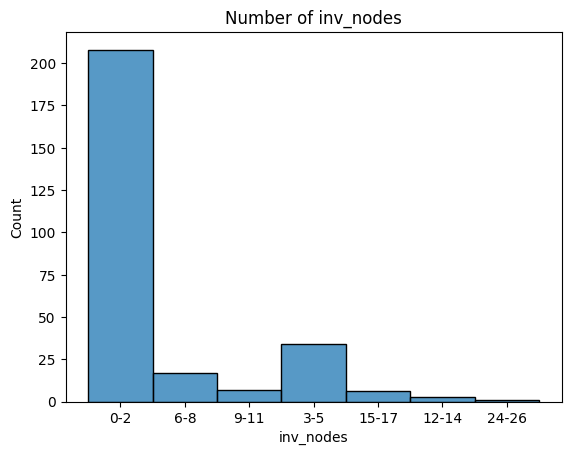

Proportion of inv_nodes
inv_nodes
0-2      75.362319
3-5      12.318841
6-8       6.159420
9-11      2.536232
15-17     2.173913
12-14     1.086957
24-26     0.362319
Name: proportion, dtype: float64


In [64]:
sns.histplot(x = "inv_nodes", data = df)
plt.title("Number of inv_nodes")
plt.show()
print("Proportion of inv_nodes")
print(df.inv_nodes.value_counts(normalize = True)*100)


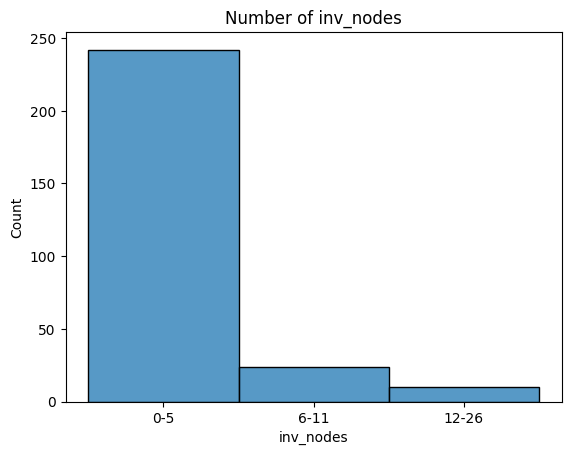

In [66]:
df['inv_nodes'] = df['inv_nodes'].replace({"0-2": "0-5", "3-5": "0-5"})
df['inv_nodes'] = df['inv_nodes'].replace({"6-8": "6-11", "9-11": "6-11"})
df['inv_nodes'] = df['inv_nodes'].replace({"15-17": "12-26", "12-14": "12-26","24-26":"12-26"})

sns.histplot(x = "inv_nodes", data = df)
plt.title("Number of inv_nodes")
plt.show()

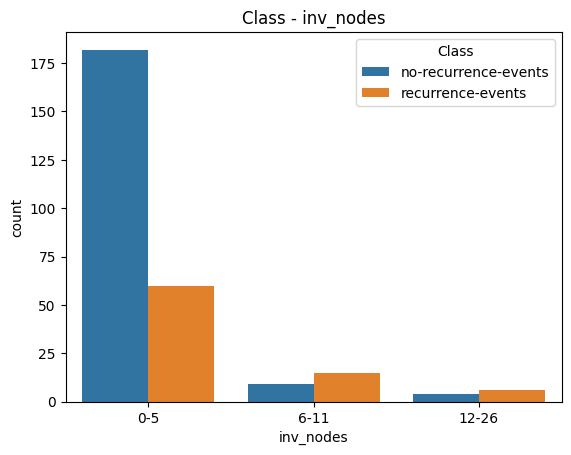

In [71]:
sns.countplot(x="inv_nodes", hue= "Class", data = df)
plt.title("Class - inv_nodes")
plt.show()

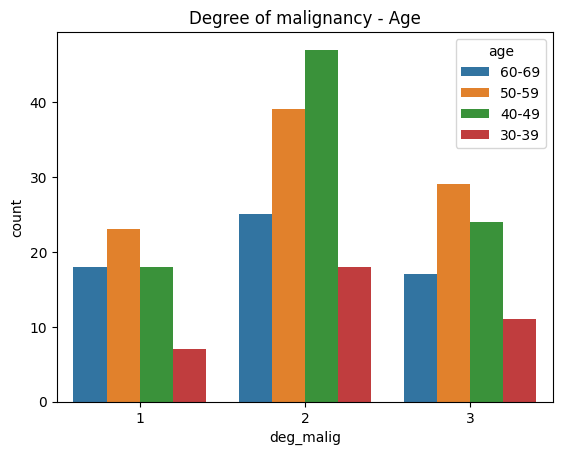

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="deg_malig", hue= "age", data = df)
plt.title("Degree of malignancy - Age")
plt.show()

In [76]:
df['Class_encoded'] = df['Class'].replace({'no-recurrence-events': 0, 'recurrence-events': 1})
print(df['Class_encoded'].value_counts())

Class_encoded
0    195
1     81
Name: count, dtype: int64


/tmp/ipython-input-19832703.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Class_encoded'] = df['Class'].replace({'no-recurrence-events': 0, 'recurrence-events': 1})


/tmp/ipython-input-2565036005.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['Class_encoded'] == 0),'deg_malig'] , color='b',shade=True,label='no-recurrence-events')
/tmp/ipython-input-2565036005.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax=sns.kdeplot(df.loc[(df['Class_encoded'] == 1),'deg_malig'] , color='r',shade=True, label='recurrence-events')


Text(0.5, 1.0, 'Class VS Degree of Malignancy')

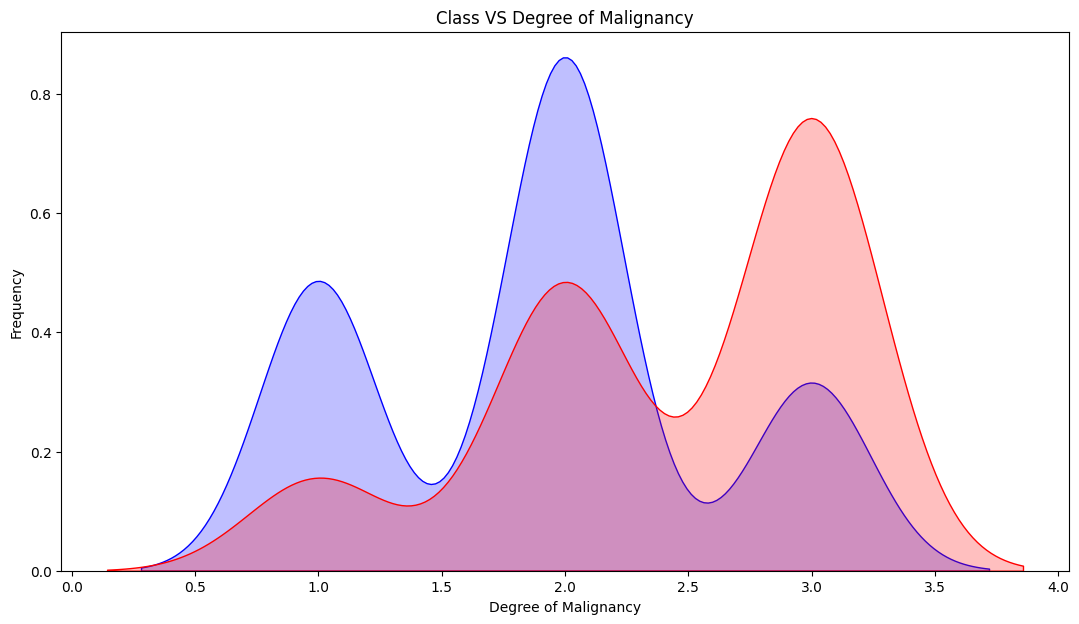

In [77]:
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(df.loc[(df['Class_encoded'] == 0),'deg_malig'] , color='b',shade=True,label='no-recurrence-events')
ax=sns.kdeplot(df.loc[(df['Class_encoded'] == 1),'deg_malig'] , color='r',shade=True, label='recurrence-events')
ax.set(xlabel='Degree of Malignancy', ylabel='Frequency')
plt.title('Class VS Degree of Malignancy')


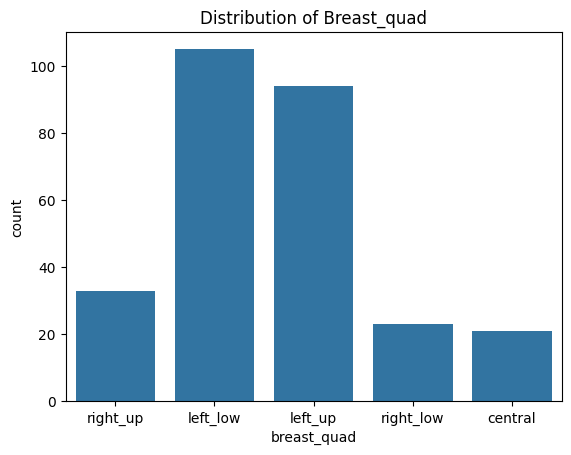

breast_quad
left_low     105
left_up       94
right_up      33
right_low     23
central       21
Name: count, dtype: int64


In [79]:
sns.countplot(x = "breast_quad", data = df)
plt.title("Distribution of Breast_quad")
plt.show()
print(df.breast_quad.value_counts())

In [80]:
import pandas as pd

# Target variable encoding
df['Class_encoded'] = df['Class'].map({'no-recurrence-events': 0, 'recurrence-events': 1})

# Binary features encoding
df['node_caps_encoded'] = df['node_caps'].map({'no': 0, 'yes': 1})
df['irradiant_encoded'] = df['irradiant'].map({'no': 0, 'yes': 1})
df['breast_encoded'] = df['breast'].map({'left': 0, 'right': 1})

# Ordinal features encoding using enumeration
age_map = {val: i for i, val in enumerate(sorted(df['age'].unique()))}
tumor_size_map = {val: i for i, val in enumerate(sorted(df['tumor_size'].unique()))}
inv_nodes_map = {val: i for i, val in enumerate(sorted(df['inv_nodes'].unique()))}

df['age_encoded'] = df['age'].map(age_map)
df['tumor_size_encoded'] = df['tumor_size'].map(tumor_size_map)
df['inv_nodes_encoded'] = df['inv_nodes'].map(inv_nodes_map)

# Ensure deg_malig is treated as a number (it's already int64, but good practice)
df['deg_malig_encoded'] = pd.to_numeric(df['deg_malig'])

# One-hot encode nominal features
df_processed = pd.get_dummies(df, columns=['menopause', 'breast_quad'], drop_first=True, dtype=int)

# Display the processed dataframe (showing encoded columns)
display(df_processed.head())

,Class,age,tumor_size,inv_nodes,node_caps,deg_malig,breast,irradiant,Class_encoded,node_caps_encoded,...,age_encoded,tumor_size_encoded,inv_nodes_encoded,deg_malig_encoded,menopause_lt40,menopause_premeno,breast_quad_left_low,breast_quad_left_up,breast_quad_right_low,breast_quad_right_up
0,no-recurrence-events,40-49,20-24,0-5,no,2,right,no,0,0,...,1,3,0,2,0,1,0,0,0,1
1,no-recurrence-events,40-49,20-24,0-5,no,2,left,no,0,0,...,1,3,0,2,0,1,1,0,0,0
2,no-recurrence-events,60-69,15-19,0-5,no,2,right,no,0,0,...,3,2,0,2,0,0,0,1,0,0
3,no-recurrence-events,40-49,0-4,0-5,no,2,right,no,0,0,...,1,0,0,2,0,1,0,0,1,0
4,no-recurrence-events,60-69,15-19,0-5,no,2,left,no,0,0,...,3,2,0,2,0,0,1,0,0,0


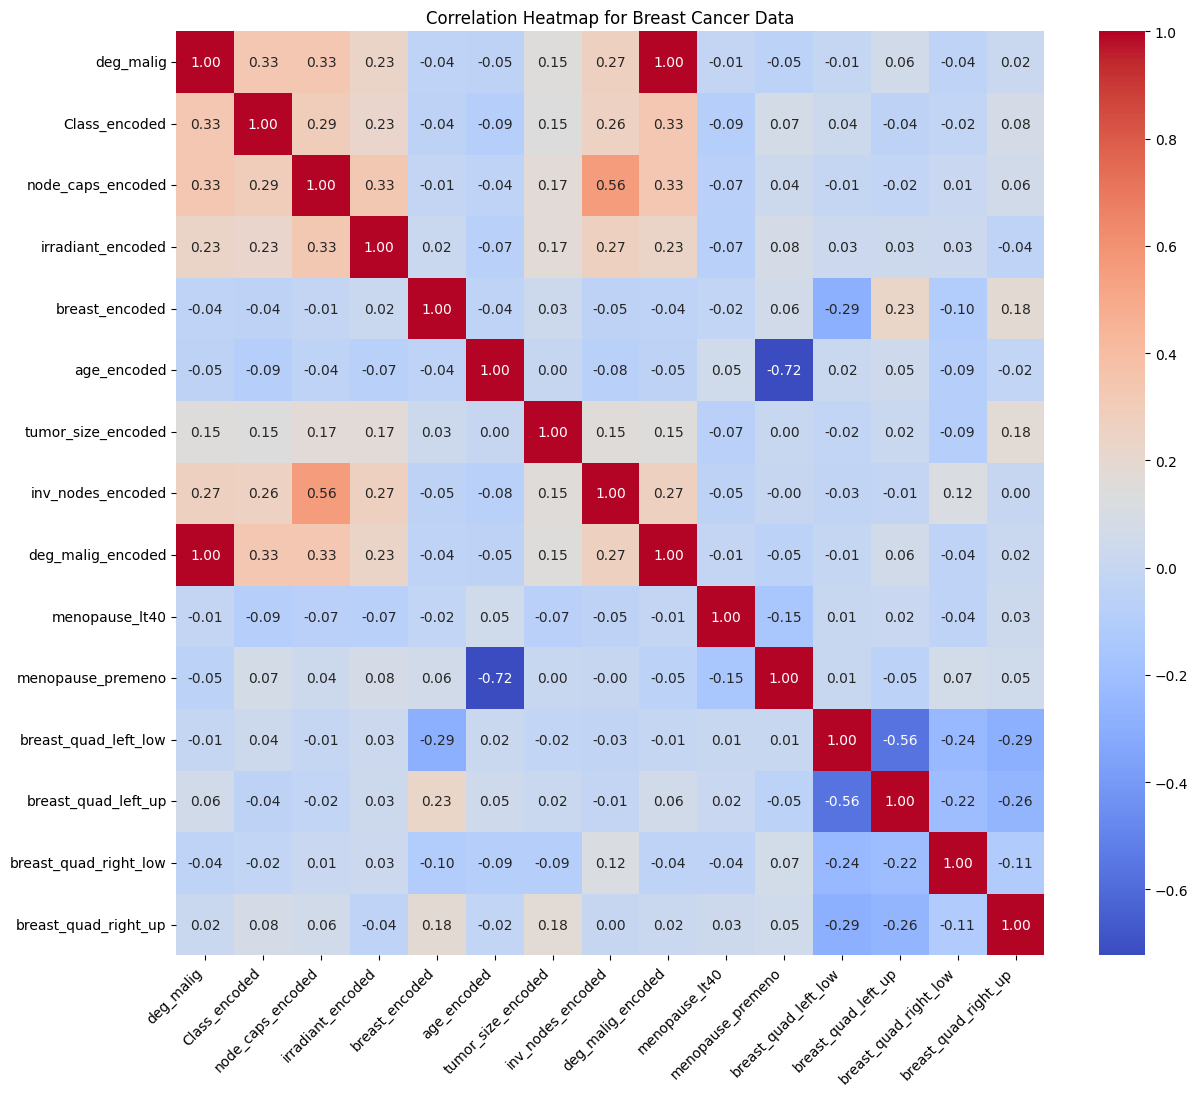

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop original categorical columns before computing correlation
categorical_cols = ['Class', 'age', 'tumor_size', 'inv_nodes', 'node_caps', 'breast', 'irradiant']
df_processed_numeric = df_processed.drop(columns=categorical_cols)


# Compute correlation matrix
corr_matrix = df_processed_numeric.corr()

# Plot heatmap
plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap for Breast Cancer Data')
plt.xticks(rotation=45,ha ='right')
plt.yticks(rotation=0)
plt.show()

In [85]:
import pickle

# Define the filename for the pickle file
filename = 'breast_cancer_processed_data.pkl'

# Save the processed dataframe to a pickle file
with open(filename, 'wb') as f:
    pickle.dump(df_processed, f)

print(f"Processed DataFrame saved to '{filename}'.")

Processed DataFrame saved to 'breast_cancer_processed_data.pkl'.
